In [1]:
from sklearn.datasets import load_diabetes

In [2]:
data=load_diabetes()

In [3]:
print(data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
X=data.data

In [5]:
y=data.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model=LinearRegression()

In [10]:
model.fit(X,y)

LinearRegression()

In [11]:
print(model.coef_)
print(model.intercept_)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
152.1334841628965


In [12]:
y_pred=model.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [14]:
print("R2 score :",r2_score(y_test,y_pred))

R2 score : 0.4776930961263348


In [15]:
import numpy as np

In [16]:
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE : 52.60476438518237


In [17]:
from sklearn.linear_model import Ridge

In [40]:
model=Ridge(alpha=0.0001)

In [41]:
model.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [42]:
y_pred=model.predict(X_test)

In [43]:
print("R score :",r2_score(y_test,y_pred))

R score : 0.452703613059931


In [45]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)


In [46]:
import matplotlib.pyplot as plt

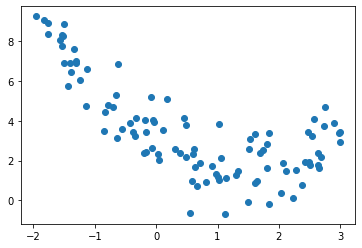

In [47]:
plt.scatter(x1,x2)
plt.show()

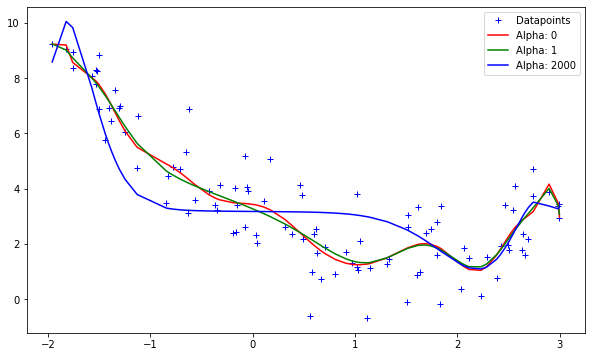

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 1, 2000]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()